## Demo: Forcasting Stock Performance in Our Portfolio

This program retrieves stock price data using the Alpaca API and then simulates future performance using Monte Carlo Simulation.

### Import Dependencies

In [13]:
# Import libraries and dependencies
import os
import pandas as pd
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

In [14]:
# Load .env enviroment variables
from dotenv import load_dotenv
load_dotenv()

True

In [15]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

### Get Past 3 Year's Worth of Microsoft and Coca-Cola Stock Price Data via Alpaca API Call

In [24]:
# Set timeframe to '1D'
timeframe = "1D"

# Set start and end datetimes between now and 3 years ago.
start_date = pd.Timestamp("2018-02-16", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2021-02-16", tz="America/New_York").isoformat()

# Set the ticker information
tickers = ["AGG","SPY"]

# Get 3 year's worth of historical price data for Microsoft and Coca-Cola
df_ticker = api.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Display sample data
df_ticker.head()

AGG                                      SPY  \
                             open    high     low   close   volume    open   
time                                                                         
2020-09-23 00:00:00-04:00  118.35  118.35  118.07  118.09  4078056  330.90   
2020-09-24 00:00:00-04:00  118.01  118.16  118.01  118.10  3950529  321.22   
2020-09-25 00:00:00-04:00  118.12  118.17  118.05  118.13  4895506  322.58   
2020-09-28 00:00:00-04:00  118.18  118.22  118.11  118.20  5318716  333.22   
2020-09-29 00:00:00-04:00  118.28  118.33  118.21  118.23  3974292  333.97   

                                                                
                              high       low   close    volume  
time                                                            
2020-09-23 00:00:00-04:00  331.200  322.1000  322.66  78352297  
2020-09-24 00:00:00-04:00  326.797  319.8000  323.52  69365554  
2020-09-25 00:00:00-04:00  329.580  321.6400  328.69  59224994  
2020-09-28 00:00:00-04:00  334.960  332.1500  334.20  55126711  
2020-09-29 00:00:00-04:00  334.770  331.6209  332.39  40380416

### The MCForecastTools Library at a Glance

In [17]:
# Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for runnning Monte Carlo simulation on portfolio price data. 

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
    
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number 

### Simulate five year portfolio growth using Monte Carlo simulation

In [18]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveyear = MCSimulation(
    portfolio_data = df_ticker,
    weights = [.60,.40],
    num_simulation = 500,
    num_trading_days = 252*5
)

In [7]:
# Printing the simulation input data
MC_fiveyear.portfolio_data.head()

KO                                   \
                            open    high    low   close    volume   
time                                                                
2020-09-23 00:00:00-04:00  49.73  49.920  48.17  48.220  11217990   
2020-09-24 00:00:00-04:00  48.21  49.100  47.56  48.705  14824253   
2020-09-25 00:00:00-04:00  48.20  48.760  47.98  48.730  10085772   
2020-09-28 00:00:00-04:00  49.31  49.710  49.14  49.290   9444759   
2020-09-29 00:00:00-04:00  49.39  49.555  48.91  48.920  17445020   

                                          MSFT                          \
                          daily_return    open    high     low   close   
time                                                                     
2020-09-23 00:00:00-04:00          NaN  207.90  208.10  200.03  200.59   
2020-09-24 00:00:00-04:00     0.010058  199.85  205.57  199.20  203.18   
2020-09-25 00:00:00-04:00     0.000513  203.55  209.04  202.54  207.77   
2020-09-28 00:00:00-04:00     0.011492  210.95  212.57  208.06  209.61   
2020-09-29 00:00:00-04:00    -0.007507  209.35  210.07  206.81  207.16   

                                                  
                             volume daily_return  
time                                              
2020-09-23 00:00:00-04:00  25085940          NaN  
2020-09-24 00:00:00-04:00  27541419     0.012912  
2020-09-25 00:00:00-04:00  25019068     0.022591  
2020-09-28 00:00:00-04:00  25144753     0.008856  
2020-09-29 00:00:00-04:00  19523789    -0.011688

### .calc_cumalative_return() does the following:
    1.) Calculates the mean and std of stock daily returns
    2.) Calculates forcasted stock price by using the last close price and multiplying it by 1 + a randomly generated daily return. [i.e., price * (1 + return)]
    3.) After storing all prices .pct_change() is used to find the forcasted daily returns.
    4.) .dot() is used to calculate the weighted daily returns.
    5.) .cumprod() is used to calculate cumulative returns
    6.) a cummulative returns multiplier is created for each day (1260), 500 times 

In [19]:
# Running a Monte Carlo simulation to forecast five years cumulative returns

MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993497,1.011562,0.995844,0.991420,1.003100,1.007026,0.998980,1.005373,0.992674,0.994234,...,0.982939,0.986020,0.993592,0.982125,1.001936,0.989469,1.009477,0.993988,1.002650,0.997730
2,0.978792,1.013544,1.008673,0.993177,0.987558,1.021018,1.004555,1.009796,0.980386,0.998180,...,0.980242,0.996059,0.972394,0.976194,0.997804,0.981833,0.991338,0.993639,1.006293,0.990840
3,0.973936,1.020201,0.996624,0.996979,0.966822,1.026774,0.997486,1.006586,0.970894,1.017534,...,0.978821,1.005912,0.958820,0.982342,1.004520,0.989786,0.986479,0.977544,1.012358,0.971161
4,0.971511,1.028987,1.011940,1.003662,0.973576,1.040748,0.989766,1.004105,0.972596,1.017944,...,0.979777,0.999375,0.958910,0.980519,1.015852,0.984413,0.975909,0.972712,1.008771,0.994313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,7.057976,2.674121,2.450791,4.211443,6.384905,2.934266,4.194847,4.478291,4.355727,3.861231,...,3.180193,3.587269,5.481840,4.155352,6.772715,4.150002,3.572236,6.233662,3.129046,4.533879
1257,7.081825,2.661295,2.440503,4.218021,6.314152,2.908894,4.192004,4.557646,4.388367,3.899804,...,3.205019,3.505296,5.658150,4.136642,6.855639,4.103087,3.646558,6.244121,3.128784,4.481577
1258,7.129141,2.642602,2.458822,4.259792,6.351160,2.912062,4.258300,4.525246,4.383472,3.920240,...,3.228632,3.541622,5.551083,4.075866,6.870547,4.067796,3.614273,6.106606,3.176747,4.504227
1259,7.112394,2.675052,2.446235,4.152193,6.381338,2.894225,4.341181,4.512396,4.421702,3.908092,...,3.249587,3.520421,5.517273,4.084069,6.779541,4.077268,3.598620,6.038800,3.182374,4.552009


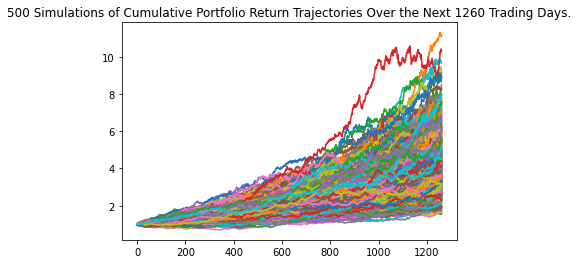

In [20]:
# Plot simulation outcomes
line_plot = MC_fiveyear.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_fiveyear_sim_plot.png", bbox_inches="tight")

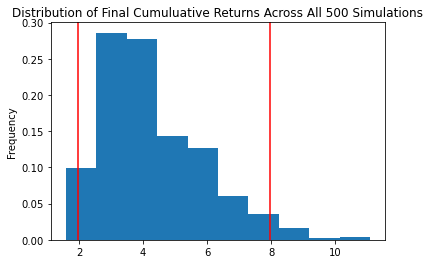

In [21]:
# Plot probability distribution and confidence intervals
dist_plot = MC_fiveyear.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_fiveyear_dist_plot.png',bbox_inches='tight')

In [22]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = MC_fiveyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean              4.285000
std               1.604322
min               1.581990
25%               3.127291
50%               3.962501
75%               5.258487
max              11.095038
95% CI Lower      1.951542
95% CI Upper      7.954872
Name: 1260, dtype: float64


In [23]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $10,000 investments in Coca-Cola and Microsoft stocks
ci_lower = round(tbl[8]*10000,2)
ci_upper = round(tbl[9]*10000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $10,000 in the portfolio"
      f" over the next 5 years will end within the range of"
      f" ${ci_lower} and ${ci_upper}")


There is a 95% chance that an initial investment of $10,000 in the portfolio over the next 5 years will end within the range of $19515.42 and $79548.72
